# **[Introduction to Linear Regression in Python](https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0)**

A quick tutorial on how to implement linear regressions with the Python `statsmodels` & `scikit-learn` libraries.

---

## **Basic concepts and mathematics**

Ther are two kinds of variables in a linear regression model.

- The **input** or **predictor variable** is the variable(s) that help predict the value of the output variable. It is commonly referred to as *X*-

- The **output variable** is the vriable that we want to **predict**. It is commonly referred to as *Y*.

To estimate *Y* using linear regression, we assume the equation:

$$\hat{Y} = \alpha + \beta \cdot X$$

 Our goal is to find **statistically significant values** of the **parameters** $\alpha$ and $\beta$ that minimise the difference between *Y* and $\hat{Y}$.

 $$\beta = \frac{\sum_{i=1}^n (X_i - \hat{X})(Y_i - \hat{Y})}{\sum_{i=1}^n (X_i - \bar{X})^2}$$

 $$\alpha = \bar{Y} - \beta \cdot \bar{X}; \beta = \frac{Cov(X,Y)}{Var(X)}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate 'random' date
np.random.seed(0)

X = 2.5 * np.random.randn(100) + 1.5 # Array of 100 values with mean = 1.5; stddev = 2.5
res = 0.5 * np.random.randn(100) # Generate 100 residual terms
y = 2 + 0.3 * X + res

# Create a pandas datarame to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the dataframe's head
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


## **OLS estimation**

To estimate *y* using the OLS method, we need to calculate `xmean` and `ymean`, the covariance of *X* and *y* `xycov`, and the variance of *X* `xvar` before we can determine the values for `alpha` and `beta`.

In [8]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needef for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)

# Print the results
print(f'alpha: {alpha:.2f}')
print(f'beta: {beta:.2f}')

alpha: 2.00
beta: 0.32


In [9]:
# Do some predictions with the results
ypred = alpha + beta * X

# Show the predictions
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

Text(0, 0.5, '$Y')

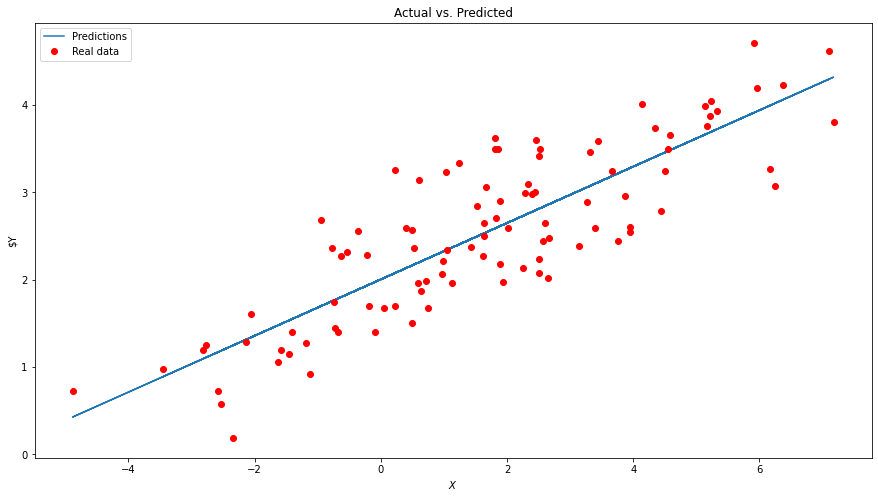

In [10]:
# Plot regression against actual data
plt.figure(figsize=(15,8))
plt.plot(X, ypred, label='Predictions') # Regression line
plt.plot(X, y, 'ro', label='Real data') # Scatter plot using actual data
plt.title('Actual vs. Predicted')
plt.legend()

# Add labels to axis
plt.xlabel('$X$')
plt.ylabel('$Y')

## **Linear Regression with `statsmodels`**

In [12]:
# Import and display first five rows of adversting dataset
advert = pd.read_csv('Advertising.csv')

# Show the structure of the dataframe
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Show the dataframe's head
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


First, we use `statsmodels`'s `ols` function to initialise our simple linear regression model. This takes the formula `y ~ x`, where `x` is the predictor variable and `y` is the output variable. Then, we fit the model by calling the OLS object's `fit()` method.

In [16]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using statsmodels
model = smf.ols('sales ~ TV', data=advert).fit()

In [17]:
# Show the models parameters
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

Text(0.5, 1.0, 'TV vs. Sales')

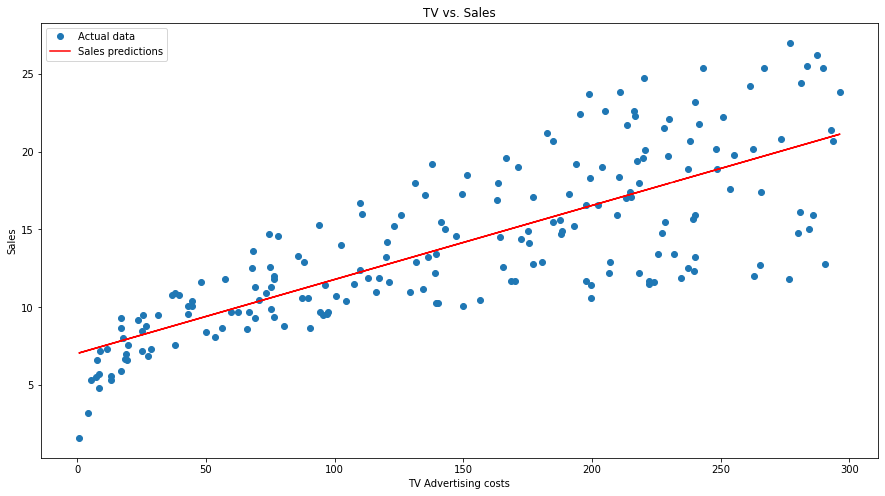

In [20]:
# Predict values+
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(15,8))
plt.plot(advert['TV'], advert['sales'], 'o', label='Actual data') # Scatter plot showing actual data
plt.plot(advert['TV'], sales_pred, 'r', label='Sales predictions') # Regression line

# Add aesthetics
plt.legend()
plt.xlabel('TV Advertising costs')
plt.ylabel('Sales')
plt.title('TV vs. Sales')

## **Linear Regression with `scikit-learn`**

In [22]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'radio']
X = advert[predictors]
y = advert['sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [24]:
# Get the alpha (intercept) and beta (coefficient) from the fit model
model.intercept_, model.coef_, model.score(X, y)

(2.9210999124051362, array([0.04575482, 0.18799423]), 0.8971942610828957)